In [143]:
from graphviz import Digraph
import torch
from value_class import Value
from layer_class import MLP

In [174]:
def trace(root):
    # builds a set of all nodes & edges in a graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    
    build(root)
    return nodes, edges

In [175]:
def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    
    for n in nodes:
        uid = str(id(n))

        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')

        if n._op:
            # If this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)

            # and connect this node to it
            dot.edge(uid + n._op, uid)

    
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)


    return dot

## Creating a neuron

In [116]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

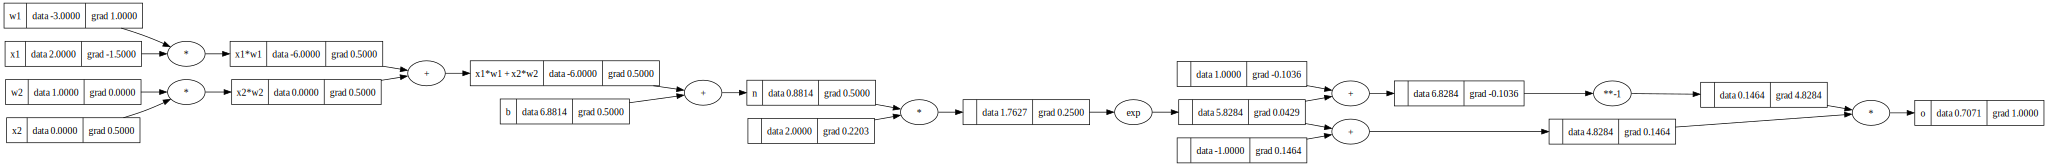

In [125]:
draw_dot(o)

In [124]:
# inputs x1, x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of neuron
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'


e = (2*n).exp()

o = (e - 1) / (e + 1)

o.label = 'o'
o.backward()

## Pytorch version

In [135]:
x1 = torch.Tensor([2.0]).double()                   ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                   ; x2.requires_grad = True

w1 = torch.Tensor([-3.0]).double()                  ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                   ; w2.requires_grad = True

b = torch.Tensor([6.8813735870195432]).double()     ; b.requires_grad = True

n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print("forward pass:")
print("\t", o.data.item())
o.backward()

print('\n________________')
print("gradients:")
print(f'\tx2 {x2.grad.item()}')
print(f'\tw2 {w2.grad.item()}')

print(f'\tx1 {x1.grad.item()}')
print(f'\tw1 {w1.grad.item()}')

forward pass:
	 0.7071066904050358

________________
gradients:
	x2 0.5000001283844369
	w2 0.0
	x1 -1.5000003851533106
	w1 1.0000002567688737


## Creating a 2 layer MLP

In [191]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.153650528466329, grad=0.0)

In [192]:
n.parameters()

[Value(data=0.3187981400515969, grad=0.0),
 Value(data=0.23671249341409029, grad=0.0),
 Value(data=-0.20962157487807076, grad=0.0),
 Value(data=0.37282450675141976, grad=0.0),
 Value(data=0.28389536064070775, grad=0.0),
 Value(data=0.29278681983716837, grad=0.0),
 Value(data=0.45944721186628423, grad=0.0),
 Value(data=-0.6106016954097717, grad=0.0),
 Value(data=0.959808173896538, grad=0.0),
 Value(data=-0.4753451937118096, grad=0.0),
 Value(data=-0.7899259323649355, grad=0.0),
 Value(data=0.5302455272372553, grad=0.0),
 Value(data=-0.9318097239547176, grad=0.0),
 Value(data=0.5198770316741839, grad=0.0),
 Value(data=0.73832887371034, grad=0.0),
 Value(data=0.15420214154911993, grad=0.0),
 Value(data=-0.256810200079312, grad=0.0),
 Value(data=0.4033113314014183, grad=0.0),
 Value(data=-0.40450778379319674, grad=0.0),
 Value(data=-0.7082767028866948, grad=0.0),
 Value(data=0.2469548885781101, grad=0.0),
 Value(data=0.24484843378827414, grad=0.0),
 Value(data=0.030524856026692193, grad=0.

## Binary classifier

In [187]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [1.0, -1.0, -1.0, 1.0] # desired targets

ypred = [n(x) for x in xs]
ypred

[Value(data=0.6353498624393432, grad=0.0),
 Value(data=0.9054745361250353, grad=0.0),
 Value(data=0.6929690403022624, grad=0.0),
 Value(data=0.634217156596564, grad=0.0)]

In [188]:
# Mean sq error loss
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
loss

Value(data=6.76374419059419, grad=0.0)

In [181]:
loss.backward()

In [189]:
n.layers[0].neurons[0].w[0]

Value(data=-0.30003332709781794)

In [190]:
n.layers[0].neurons[0].w[0].data

-0.30003332709781794

In [ ]:
for p in n.parameters():
    p.data += 0.01 * p.grad